In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA  # Добавляем этот импорт
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [3]:
df = pd.read_csv('Factors_ affecting_ university_student_grades_dataset.csv')
df.head()

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,22.0,F,College,50000.0,A,81.0,Medium,8.0,Law,Private,...,Neutral,NaN,No,Visual,Yes,NaN,Low,2.0,NaN,B
1,21.0,M,NaN,60000.0,A,NaN,Medium,12.0,Law,Public,...,Negative,No,No,Auditory,Yes,Yes,Medium,5.0,High,NaN
2,19.0,M,College,75000.0,C,93.0,Medium,12.0,Law,Private,...,Neutral,No,Yes,NaN,No,No,Low,2.0,High,A
3,21.0,M,College,60000.0,A,86.0,Low,15.0,Business,Public,...,Neutral,No,NaN,Auditory,Yes,Yes,Low,3.0,Medium,C
4,19.0,NaN,NaN,40000.0,NaN,89.0,High,15.0,Medicine,NaN,...,Positive,No,No,Auditory,Yes,NaN,Medium,3.0,High,B


In [4]:
df

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,22.0,F,College,50000.0,A,81.0,Medium,8.0,Law,Private,...,Neutral,NaN,No,Visual,Yes,NaN,Low,2.0,NaN,B
1,21.0,M,NaN,60000.0,A,NaN,Medium,12.0,Law,Public,...,Negative,No,No,Auditory,Yes,Yes,Medium,5.0,High,NaN
2,19.0,M,College,75000.0,C,93.0,Medium,12.0,Law,Private,...,Neutral,No,Yes,NaN,No,No,Low,2.0,High,A
3,21.0,M,College,60000.0,A,86.0,Low,15.0,Business,Public,...,Neutral,No,NaN,Auditory,Yes,Yes,Low,3.0,Medium,C
4,19.0,NaN,NaN,40000.0,NaN,89.0,High,15.0,Medicine,NaN,...,Positive,No,No,Auditory,Yes,NaN,Medium,3.0,High,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,20.0,NaN,Some College,75000.0,A,78.0,NaN,16.0,Law,Private,...,Positive,Yes,Yes,Auditory,No,No,Medium,3.0,Low,B
10060,19.0,M,College,NaN,B,NaN,Medium,5.0,Science,Public,...,Positive,Yes,Yes,Visual,Yes,No,Low,4.0,High,A
10061,20.0,M,NaN,30000.0,B,97.0,Medium,7.0,Engineering,Public,...,Positive,Yes,Yes,Kinesthetic,No,No,High,3.0,High,A
10062,21.0,F,College,50000.0,B,75.0,Medium,15.0,NaN,Public,...,Negative,Yes,No,Kinesthetic,Yes,Yes,Low,4.0,Medium,A


In [5]:
# Удаляем ненужные столбцы
df = df.drop(columns=["Tutoring", "Mentoring","Screen_Time", "Educational_Tech_Use"])


In [6]:
df = df.drop(columns=["Sports_Participation", "Class_Participation", "Previous_Grades","Peer_Group", "Study_Space" ])

In [7]:
df = df.drop(columns=["Parental_Involvement", "Class_Size", "Extracurricular_Activities","Time_Wasted_on_Social_Media" ])

In [8]:
df = df.drop(columns=["Financial_Status", "Educational_Resources", "Bullying"])

In [18]:
df_new = df.fillna(0)

In [31]:
df_new

,Age,Gender,Parental_Education,Family_Income,Attendance,Study_Hours,Major,School_Type,Motivation,Self_Esteem,Stress_Levels,School_Environment,Professor_Quality,Sleep_Patterns,Nutrition,Physical_Activity,Learning_Style,Lack_of_Interest,Grades
0,22.0,1,1,3,81.0,8.0,4,1,3,2,1,1,3,6.0,3,2,3,2,B
1,21.0,2,0,4,0.0,12.0,4,2,0,1,0,1,1,5.0,2,2,1,3,0
2,19.0,2,1,5,93.0,12.0,4,1,2,2,1,3,3,6.0,3,1,0,2,A
3,21.0,2,1,4,86.0,15.0,2,2,1,3,3,3,1,5.0,0,1,1,2,C
4,19.0,0,0,2,89.0,15.0,5,0,1,0,1,1,0,4.0,3,2,1,3,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,20.0,0,4,5,78.0,16.0,4,1,1,3,1,3,3,7.0,3,1,1,3,B
10060,19.0,2,1,0,0.0,5.0,6,2,1,3,0,0,1,7.0,3,2,3,2,A
10061,20.0,2,0,1,97.0,7.0,3,2,3,2,2,1,2,4.0,1,2,2,1,A
10062,21.0,1,1,3,75.0,15.0,0,2,2,2,1,1,3,8.0,1,1,2,2,A


In [ ]:

# Загрузка данных (если нужно)
# df = pd.read_csv("data.csv")

# 1. Заменяем все возможные варианты пропусков на NaN
#df.replace(["", "NA", "N/A", "null", "NaN", "None", "nan", "?"], np.nan, inplace=True)

# 2. Удаляем ВСЕ строки, где есть хотя бы один NaN
#df_cleaned = df.dropna()

# 3. Проверяем результат
#print("Пропуски после очистки:\n", df_cleaned.isna().sum())
#print("Новый размер данных:", df_cleaned.shape)

Пропуски после очистки:
 Age                   0
Gender                0
Parental_Education    0
Family_Income         0
Attendance            0
Study_Hours           0
Major                 0
School_Type           0
Motivation            0
Self_Esteem           0
Stress_Levels         0
School_Environment    0
Professor_Quality     0
Sleep_Patterns        0
Nutrition             0
Physical_Activity     0
Learning_Style        0
Lack_of_Interest      0
Grades                0
dtype: int64
Новый размер данных: (1466, 19)


In [32]:
df_new.dtypes

Age                   float64
Gender                  int32
Parental_Education      int32
Family_Income           int32
Attendance            float64
Study_Hours           float64
Major                   int32
School_Type             int32
Motivation              int32
Self_Esteem             int32
Stress_Levels           int32
School_Environment      int32
Professor_Quality       int32
Sleep_Patterns        float64
Nutrition               int32
Physical_Activity       int32
Learning_Style          int32
Lack_of_Interest        int32
Grades                 object
dtype: object

In [33]:
# Выбор признаков
features = ['Age', 'Gender', 'Parental_Education', 'Family_Income', 'Attendance', 
            'Study_Hours', 'Major', 'School_Type', 'Motivation', 'Self_Esteem',
            'Stress_Levels', 'School_Environment', 'Professor_Quality',
            'Sleep_Patterns', 'Nutrition', 'Physical_Activity', 'Learning_Style',
            'Lack_of_Interest']

In [22]:
# Выбор целевой переменной
target = 'Grades'

In [34]:
# Преобразование категориальных признаков
label_encoders = {}
for col in df_new[features].select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col].astype(str))
    label_encoders[col] = le

In [37]:
df_new

,Age,Gender,Parental_Education,Family_Income,Attendance,Study_Hours,Major,School_Type,Motivation,Self_Esteem,Stress_Levels,School_Environment,Professor_Quality,Sleep_Patterns,Nutrition,Physical_Activity,Learning_Style,Lack_of_Interest,Grades
0,22.0,1,1,3,81.0,8.0,4,1,3,2,1,1,3,6.0,3,2,3,2,B
1,21.0,2,0,4,0.0,12.0,4,2,0,1,0,1,1,5.0,2,2,1,3,0
2,19.0,2,1,5,93.0,12.0,4,1,2,2,1,3,3,6.0,3,1,0,2,A
3,21.0,2,1,4,86.0,15.0,2,2,1,3,3,3,1,5.0,0,1,1,2,C
4,19.0,0,0,2,89.0,15.0,5,0,1,0,1,1,0,4.0,3,2,1,3,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,20.0,0,4,5,78.0,16.0,4,1,1,3,1,3,3,7.0,3,1,1,3,B
10060,19.0,2,1,0,0.0,5.0,6,2,1,3,0,0,1,7.0,3,2,3,2,A
10061,20.0,2,0,1,97.0,7.0,3,2,3,2,2,1,2,4.0,1,2,2,1,A
10062,21.0,1,1,3,75.0,15.0,0,2,2,2,1,1,3,8.0,1,1,2,2,A


2. Разделение набора данных на учебные и проверочные данные

In [40]:
grade_mapping = {"A": 5, "B": 4, "C": 3, "F": 2}

# Замена значений
df_new["Grades"] = df_new["Grades"].replace(grade_mapping)

In [41]:
from sklearn.model_selection import train_test_split
X = df_new.drop('Grades', axis=1)  
y = df_new['Grades'] 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state = 1000, stratify=y)

In [43]:
#Разделение набора данных на учебные и проверочные данные
from sklearn.model_selection import train_test_split
X = df_new.drop('Grades', axis=1)  
y = df_new['Grades'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state = 1000, stratify=y)

In [44]:
df_new

,Age,Gender,Parental_Education,Family_Income,Attendance,Study_Hours,Major,School_Type,Motivation,Self_Esteem,Stress_Levels,School_Environment,Professor_Quality,Sleep_Patterns,Nutrition,Physical_Activity,Learning_Style,Lack_of_Interest,Grades
0,22.0,1,1,3,81.0,8.0,4,1,3,2,1,1,3,6.0,3,2,3,2,4
1,21.0,2,0,4,0.0,12.0,4,2,0,1,0,1,1,5.0,2,2,1,3,0
2,19.0,2,1,5,93.0,12.0,4,1,2,2,1,3,3,6.0,3,1,0,2,5
3,21.0,2,1,4,86.0,15.0,2,2,1,3,3,3,1,5.0,0,1,1,2,3
4,19.0,0,0,2,89.0,15.0,5,0,1,0,1,1,0,4.0,3,2,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,20.0,0,4,5,78.0,16.0,4,1,1,3,1,3,3,7.0,3,1,1,3,4
10060,19.0,2,1,0,0.0,5.0,6,2,1,3,0,0,1,7.0,3,2,3,2,5
10061,20.0,2,0,1,97.0,7.0,3,2,3,2,2,1,2,4.0,1,2,2,1,5
10062,21.0,1,1,3,75.0,15.0,0,2,2,2,1,1,3,8.0,1,1,2,2,5


3. Масштабирование данных

In [45]:
#Масштабирование данных
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

4. Обучение базовой модели (модель №1, RF)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
#Обучение базовой модели (модель №1, RF)
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

In [50]:
# Обучение модели
model = DecisionTreeClassifier(random_state=10000)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10000)

C:\Users\Кристина\AppData\Local\Temp\ipykernel_62532\3323050479.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx], palette="viridis")


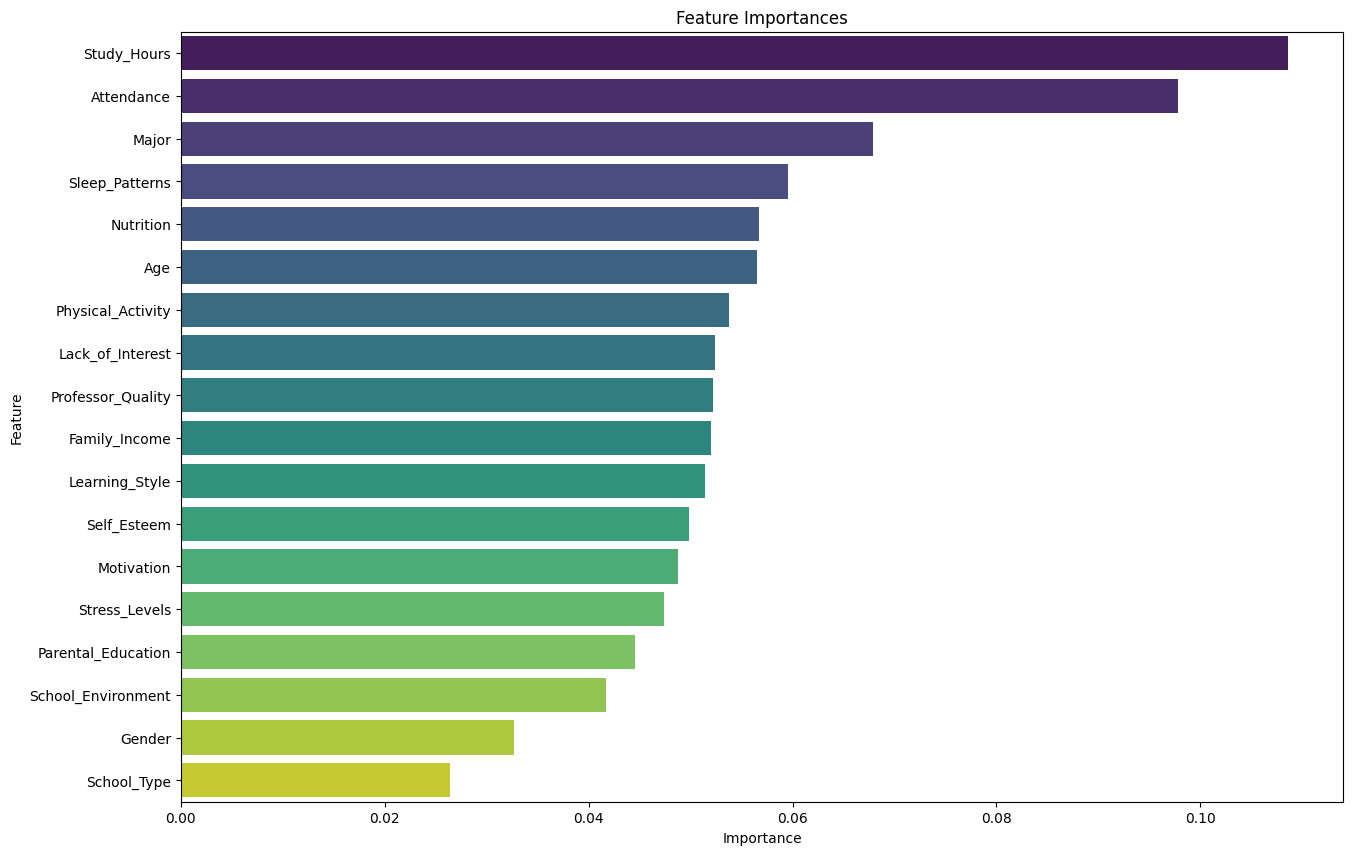

In [51]:
# Важность признаков
feature_importances = model.feature_importances_ #rfc_1
feature_names = X.columns #data
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(15, 10))
sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx], palette="viridis")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

5. Метод главных компонент

так как нет больше иксов (features)

In [69]:
#Метод главных компонент
pca_test = PCA(n_components=18) #устанавливаем 18, тк на большее ругается
pca_test.fit(X_train_scaled)

PCA(n_components=18)

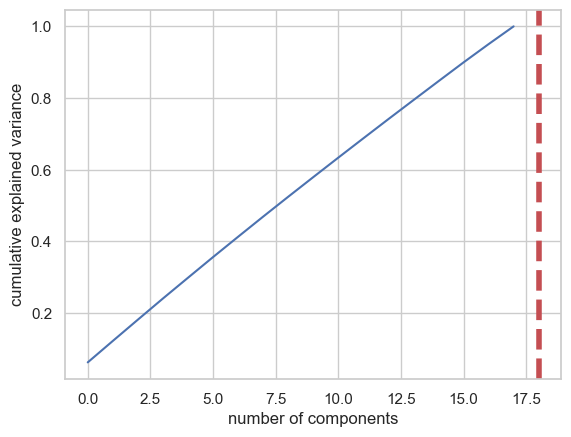

None

In [70]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=18, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

После того, как число используемых компонент превышает 10, рост их количества не очень сильно повышает объяснённую дисперсию

In [71]:
display(pca_df.head(18)) #Вывод первых 18 строк таблицы с результатами PCA

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.062279,0.062279
1,0.122071,0.059792
2,0.181424,0.059353
3,0.240441,0.059017
4,0.298358,0.057917
5,0.355999,0.057641
6,0.412715,0.056716
7,0.468914,0.056199
8,0.524341,0.055427
9,0.579132,0.054791


In [72]:
#Применение PCA с оптимальным числом компонент (например, 18)
pca = PCA(n_components=18)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [73]:
#каждая компонента — это линейная комбинация исходных переменных с соответствующими «весами». Мы можем видеть эти «веса» для каждой компоненты, создав датафрейм.
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=feature_importances, index=pca_dims)
pca_test_df.head(18).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9,PCA Component 10,PCA Component 11,PCA Component 12,PCA Component 13,PCA Component 14,PCA Component 15,PCA Component 16,PCA Component 17
0.056476,0.090684,-0.201021,0.330088,-0.235448,-0.125080,0.203859,-0.326908,-0.219580,0.491359,0.037157,0.072394,0.008839,0.270450,-0.053643,-0.014087,0.423873,0.195711,-0.179892
0.032659,-0.144353,-0.257706,0.130246,-0.191705,0.477968,-0.140901,0.101025,0.132063,0.353314,-0.013663,-0.121081,-0.244263,-0.463187,0.031845,-0.197190,-0.213485,0.237594,-0.165143
0.044494,-0.256365,0.050284,0.063325,0.201482,-0.210187,0.123747,-0.416140,0.384350,-0.122440,-0.323583,-0.168054,-0.109128,-0.224837,0.382829,-0.262822,0.283855,0.006277,0.010337
0.051977,0.324263,0.345535,0.182805,0.013232,-0.008009,-0.324205,-0.359438,0.155127,-0.103434,-0.044479,-0.250559,0.145204,0.114077,-0.074695,0.126634,-0.302272,0.465824,-0.209529
0.097773,-0.031763,-0.130516,-0.164865,0.366360,-0.222424,0.180176,0.120074,0.225457,0.521858,0.097369,-0.244982,0.384080,0.172302,0.048707,-0.170233,-0.347693,-0.038675,-0.024434
0.108601,0.372110,0.116429,-0.327015,0.010426,0.367152,-0.180682,-0.032789,0.271160,0.050816,0.211650,0.105319,0.102009,0.120521,0.163509,-0.239299,0.353818,-0.269238,-0.365793
0.067887,-0.095254,-0.103053,0.361771,-0.194358,0.079270,0.306058,-0.035338,0.564612,-0.174265,0.031744,0.141429,0.207599,-0.006821,-0.364944,0.195764,-0.095638,-0.279289,-0.196172
0.026420,0.396544,-0.355769,0.195642,0.023346,0.090797,0.000125,-0.251133,-0.066332,-0.047606,0.006544,-0.327065,-0.321569,0.150765,0.215246,0.098188,-0.256421,-0.464608,0.169255
0.048777,-0.189107,-0.043294,0.129030,0.123887,0.387949,0.089318,-0.181991,-0.486216,-0.196551,-0.142777,-0.211308,0.568785,-0.102915,0.018621,-0.115250,0.002063,-0.159357,-0.159857
0.049879,0.155534,-0.151248,0.121773,0.459153,0.045458,0.036925,-0.169824,-0.077831,0.020368,-0.068491,0.730607,-0.011738,-0.131283,0.200827,0.085978,-0.245123,0.079797,-0.136064


6. Обучение базовой RF-модели после применения к данным метода главных компонент (модель №2, RF + PCA)

In [74]:
#Обучение базовой RF-модели после применения к данным метода главных компонент (модель №2, RF + PCA)
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train_scaled_pca, y_train)
display(rfc.score(X_train_scaled_pca, y_train))

0.3129968203497615

7. Оптимизация гиперпараметров. Раунд 1: RandomizedSearchCV

Мы будем заниматься подбором следующих гиперпараметров:

1. n_estimators — число «деревьев» в «случайном лесу».
2. max_features — число признаков для выбора расщепления.
3. max_depth — максимальная глубина деревьев.
4. min_samples_split — минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться.
5. min_samples_leaf — минимальное число объектов в листьях.
6. bootstrap — использование для построения деревьев подвыборки с возвращением.

In [77]:
# Оптимизация гиперпараметров. Раунд 1: RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 100, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled_pca, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 100,
 'min_samples_split': 12,
 'min_samples_leaf': 50,
 'max_features': 'log2',
 'max_depth': 4,
 'bootstrap': True}

При значениях параметров n_iter = 100 и cv = 3, мы создали 300 RF-моделей, случайно выбирая комбинации представленных выше гиперпараметров. 

In [35]:
rs.cv_results_

{'mean_fit_time': array([1.21642741, 4.12577669, 1.86670303, 3.65323154, 0.91530458,
        2.27102105, 1.49262055, 1.28347294, 2.0752813 , 3.08073751,
        3.35480706, 5.10389932, 1.92223883, 2.35179234, 0.42178504,
        0.40403263, 1.1809326 , 0.46283952, 0.47422942, 4.54215693,
        0.36570708, 1.4831845 , 3.07506474, 2.44854641, 1.49832853,
        2.33379523, 3.86865489, 0.67235088, 4.07684962, 1.73600658,
        0.73663076, 1.97826997, 1.37556783, 1.20590099, 3.67555888,
        3.06012853, 0.40824143, 0.66917094, 3.71483628, 2.56777835,
        1.74981229, 2.36792747, 3.37110925, 0.48847191, 1.14173826,
        2.71666916, 0.72022112, 3.75159868, 3.01284448, 3.59436496,
        3.756404  , 0.87552595, 4.52041205, 4.80895408, 3.05703672,
        2.15366197, 3.80091294, 2.54087504, 2.74857569, 2.60571265,
        0.28939295, 1.6618553 , 0.37131174, 0.80293353, 2.55225889,
        4.01703366, 3.42106557, 1.14363893, 0.51384322, 2.31876707,
        0.89728737, 4.1966238 ,

In [28]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(18)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,400,34,7,log2,2,True,0.376497,1
1,100,18,12,log2,2,False,0.371077,2
2,400,2,23,log2,1,False,0.368328,3
3,300,28,7,log2,13,True,0.365618,4
4,900,50,12,log2,9,True,0.365585,5
5,700,50,23,log2,2,True,0.364219,6
6,200,12,50,sqrt,1,False,0.364208,7
7,400,2,7,log2,2,False,0.362892,8
8,100,18,12,sqrt,1,False,0.362881,9
9,600,28,2,sqrt,1,False,0.362875,10


Результаты работы алгоритма RandomizedSearchCV

Теперь создадим столбчатые графики, на которых, по оси Х, расположены значения гиперпараметров, а по оси Y — средние значения, показываемые моделями. Это позволит понять то, какие значения гиперпараметров, в среднем, лучше всего себя показывают.

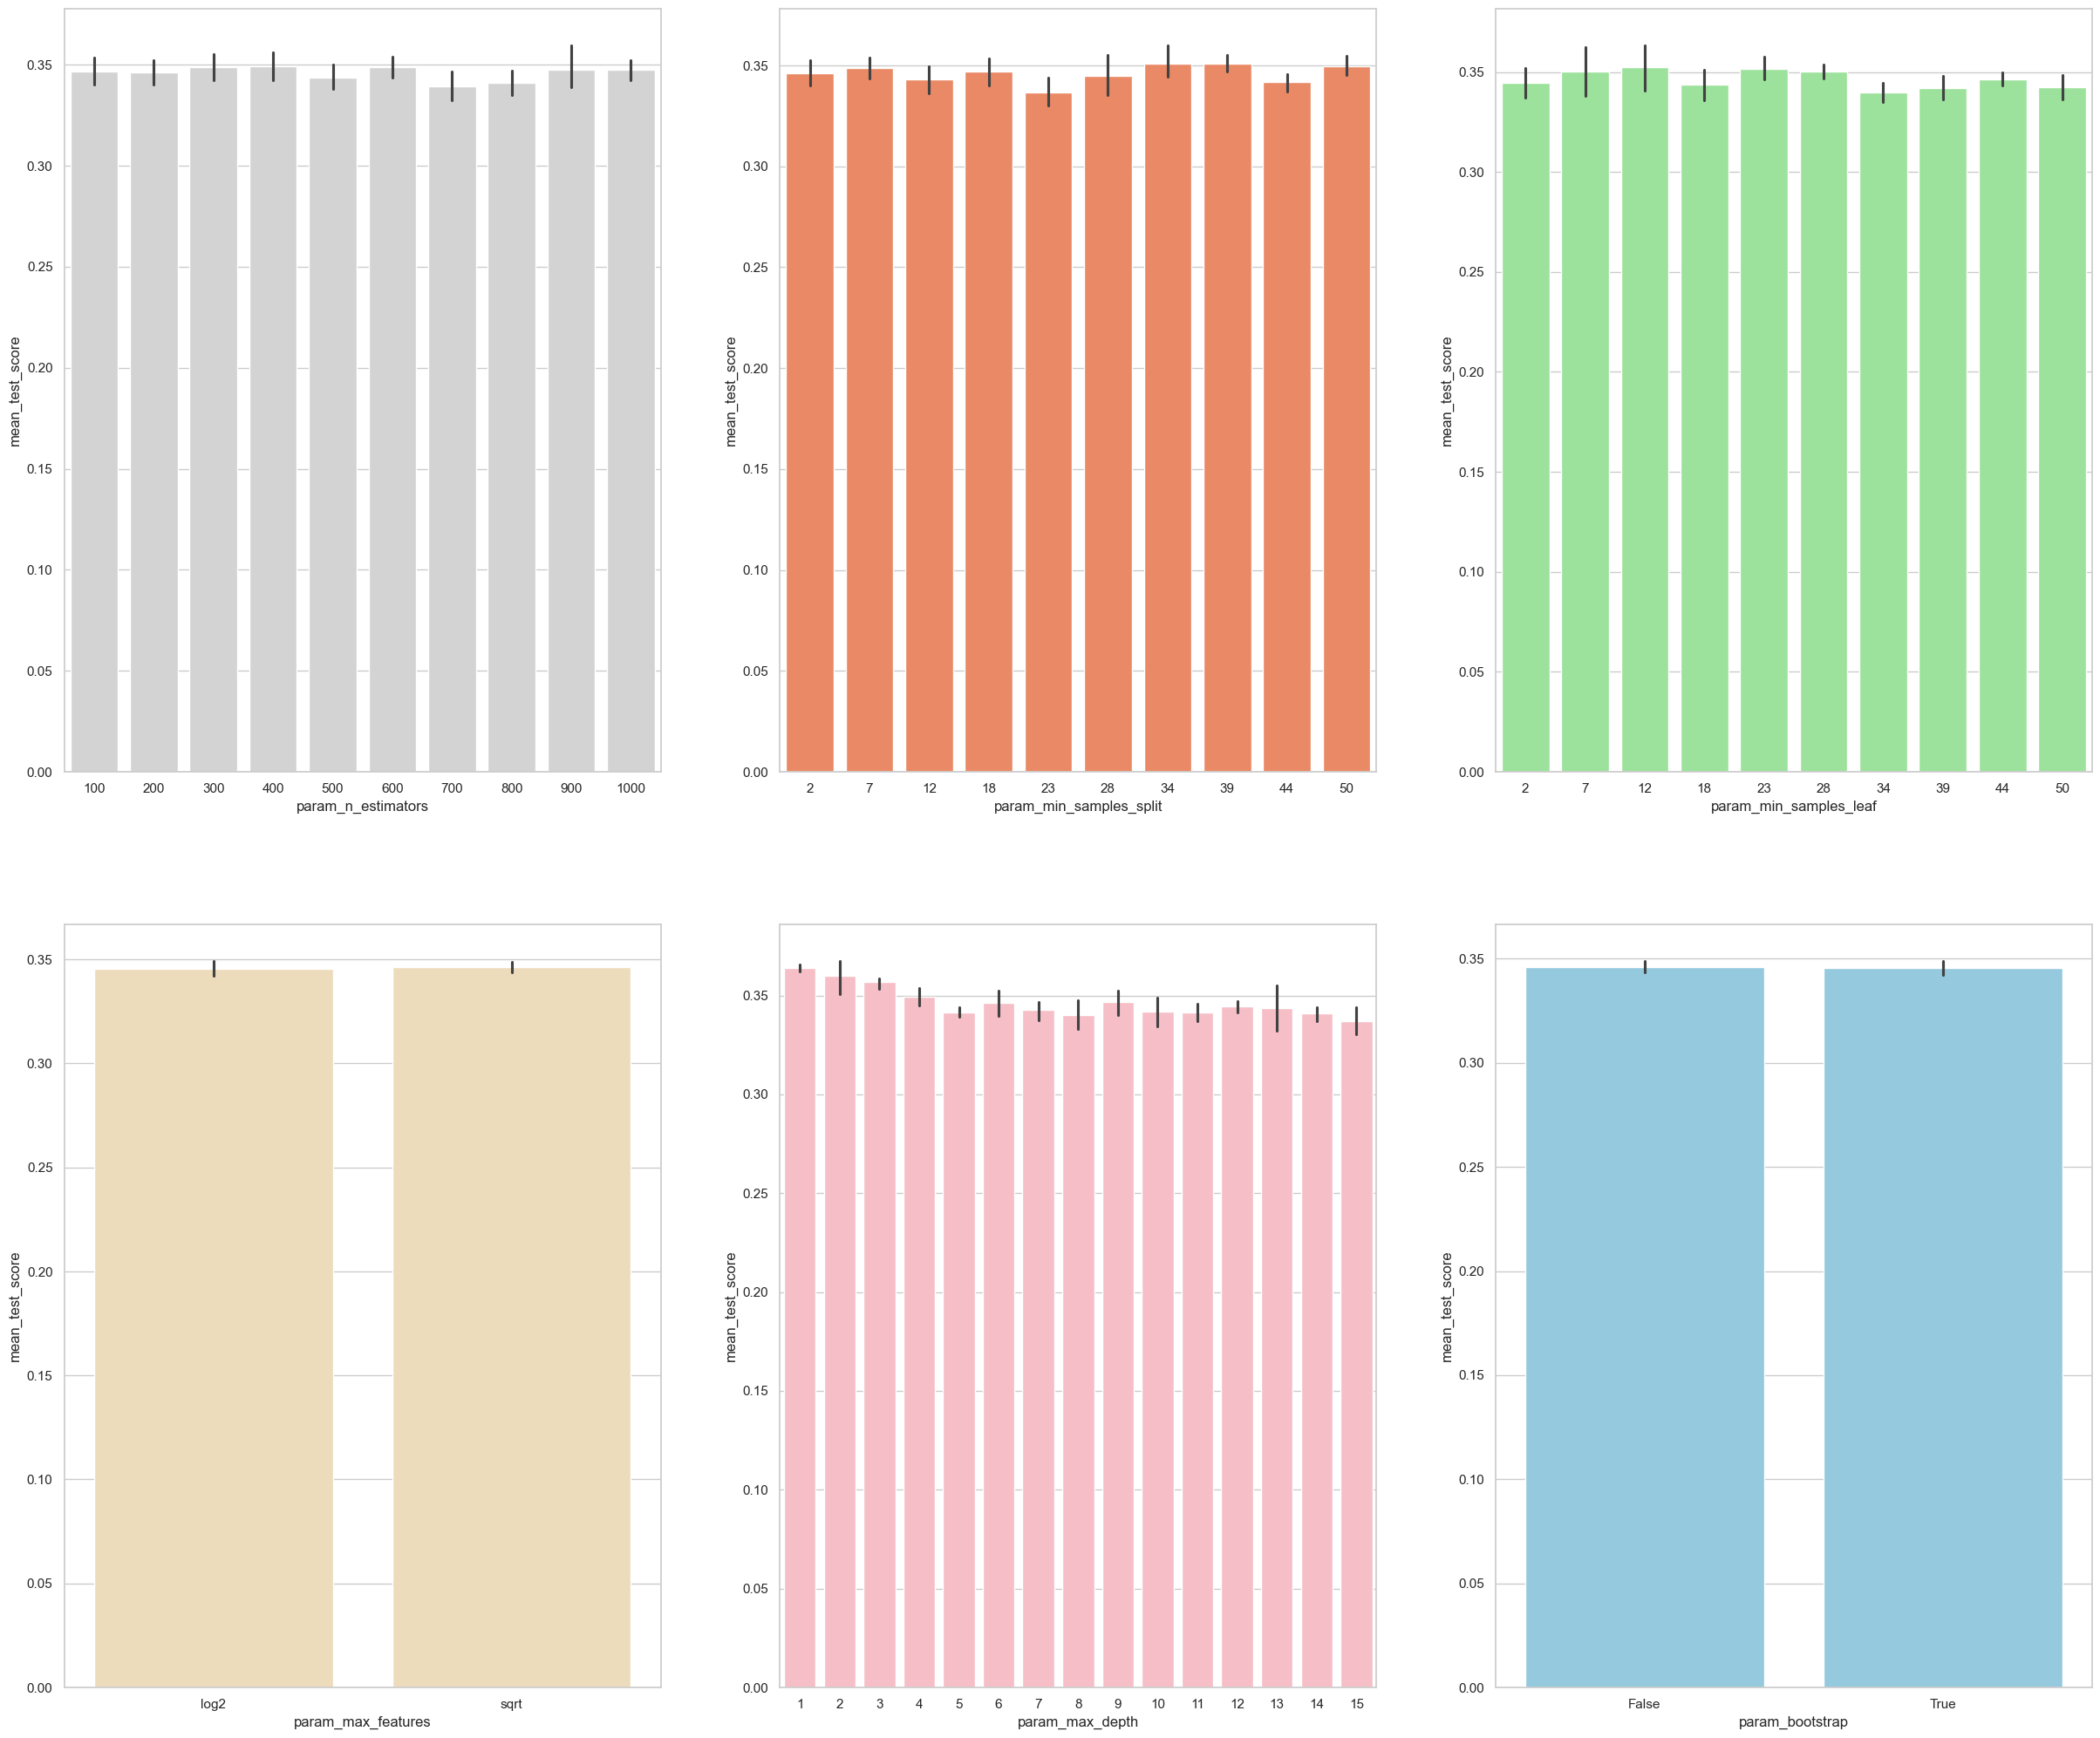

In [29]:
fig, axs = plt.subplots(ncols=3, nrows=2)

sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
plt.show()

Анализ значений гиперпараметров

1. n_estimators: значения 400, 500, 700, видимо, показывают наилучшие средние результаты.
2. min_samples_split: маленькие значения, вроде 7,23.
3. min_samples_leaf: возникает такое ощущение, что маленькие значения этого гиперпараметра дают более высокие результаты. А это значит, что мы можем испытать значения между 18 и 23.
4. max_features: вариант sqrt даёт самый высокий средний результат.
5. max_depth: тут чёткой зависимости между значением гиперпараметра и результатом работы модели не видно, но есть ощущение, что значения 1,2,7,12,15 получше остальных
6. bootstrap: значение False показывает чуть лучший результат.

8. Оптимизация гиперпараметров. Раунд 2: GridSearchCV (окончательная подготовка параметров для модели №3, RF + PCA + HT)

In [30]:
from sklearn.model_selection import GridSearchCV
n_estimators = [400,500,700]
max_features = ['sqrt']
max_depth = [1,2,7,12,15]
min_samples_split = [7,8,9,22,23,24]
min_samples_leaf = [18,19,20,21,22,23]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfc, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled_pca, y_train)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


{'bootstrap': False,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 21,
 'min_samples_split': 8,
 'n_estimators': 400}

Здесь мы применяем кросс-валидацию по 3 блокам для 540 (3 x 1 x 5 x 6 x 6 x 1) сеансов обучения модели, что даёт 1620 сеансов обучения модели.

9. Оценка качества работы моделей на проверочных данных

In [31]:
y_pred = rfc.predict(X_test_scaled)
y_pred_pca = rfc.predict(X_test_scaled_pca)
y_pred_gs = gs.best_estimator_.predict(X_test_scaled_pca)

In [32]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102  91  50]
 [101  94  52]
 [ 97  76  70]]
              precision    recall  f1-score   support

           A       0.34      0.42      0.38       243
           B       0.36      0.38      0.37       247
           C       0.41      0.29      0.34       243

    accuracy                           0.36       733
   macro avg       0.37      0.36      0.36       733
weighted avg       0.37      0.36      0.36       733



In [33]:
from sklearn.metrics import confusion_matrix

Точность модели:
Точность (accuracy) модели RandomForestClassifier составила 0.36. Это означает, что модель правильно предсказала 36% всех наблюдений в тестовой выборке.

Precision, Recall, F1-score:
Для класса A (например, "Оценка"):

Precision (точность) = 0.34
Recall (полнота) = 0.42
F1-score = 0.38

Для класса B (например, "Оценка"):
Precision (точность) = 0.36
Recall (полнота) = 0.38
F1-score = 0.37

Для класса C (например, "Оценка"):
Precision (точность) = 0.41
Recall (полнота) = 0.29
F1-score = 0.34

Macro avg и weighted avg показывают средние значения по обоим классам. В данном случае значения близки к 0.36.